In [1]:
#Lertas Giorgos 
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 1.Protein-protein interaction network

In [2]:
ppi=pd.read_csv('data/bio-decagon-ppi.csv')
ppi

,Gene 1,Gene 2
0,114787,375519
1,114787,285613
2,114787,7448
3,114787,4914
4,114787,51343
...,...,...
715607,5634,5636
715608,5635,5636
715609,5635,5631
715610,5636,5631


In [3]:
ppi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715612 entries, 0 to 715611
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Gene 1  715612 non-null  int64
 1   Gene 2  715612 non-null  int64
dtypes: int64(2)
memory usage: 10.9 MB


In [4]:
#no nan values
ppi.isnull().sum()

Gene 1    0
Gene 2    0
dtype: int64

In [5]:
ppi.nunique()

Gene 1    17544
Gene 2    17472
dtype: int64

The network has 17544 different proteins in the first column as Gene 1 and 17472 in the second as Gene 2. Also, it has 715612  physical interactions or observations.

In [6]:
ppi.max()

Gene 1    110255169
Gene 2    110255169
dtype: int64

In [7]:
ppi.min()

Gene 1    1
Gene 2    1
dtype: int64

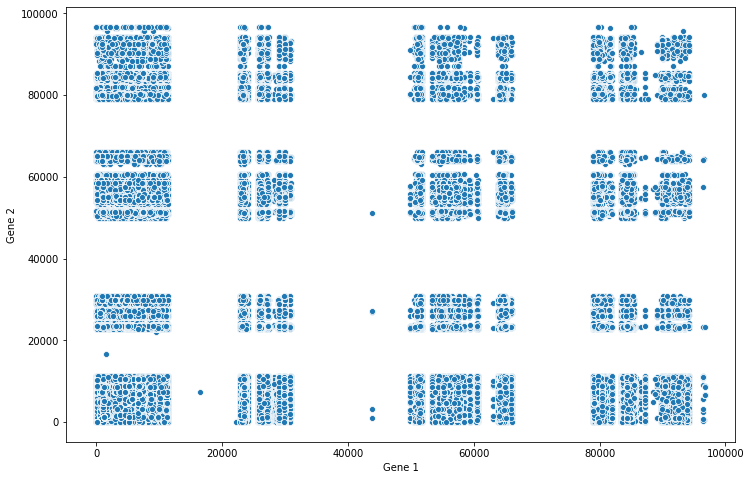

In [8]:
#plot ppi in proteins under 100.000
plt.figure(figsize=(12,8))
sns.scatterplot(x='Gene 1',y='Gene 2',data=ppi[ppi<100000]);

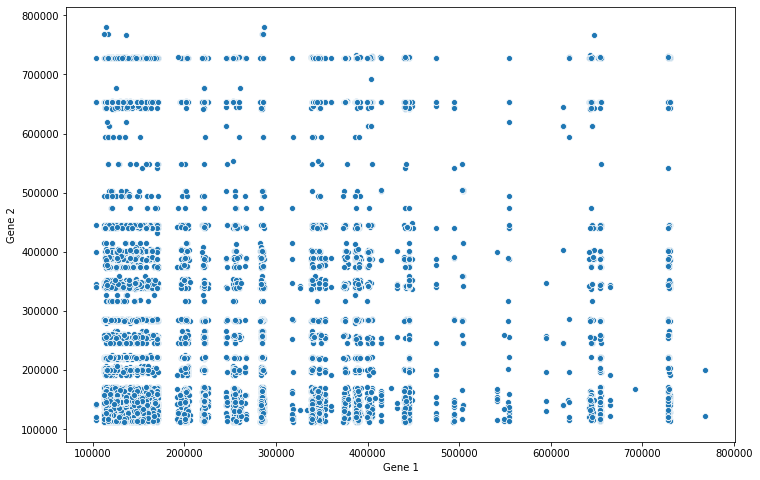

In [9]:
#plot ppi in proteins over 100.000 & under 1.000.000
plt.figure(figsize=(12,8))
sns.scatterplot(x='Gene 1',y='Gene 2',data=ppi[(ppi>100000) & (ppi<1000000)]);

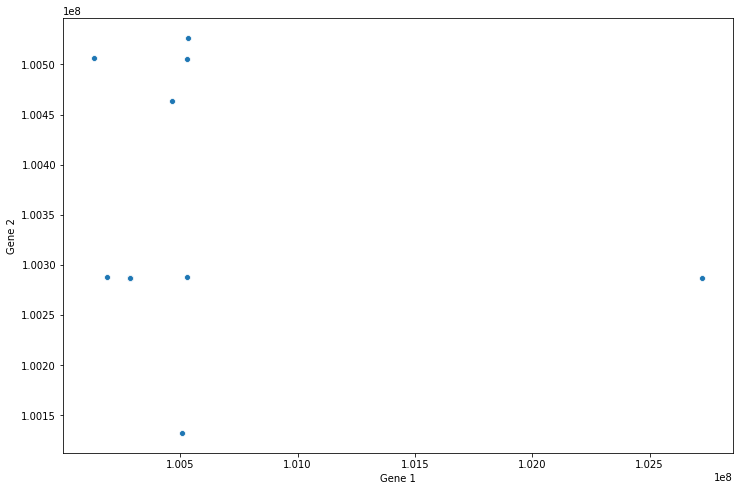

In [10]:
#plot ppi in proteins over 1.000.000
plt.figure(figsize=(12,8))
sns.scatterplot(x='Gene 1',y='Gene 2',data=ppi[ppi>1000000]);

We see that the data is in groups under 100.000 and between 100.000 and 1.000.000 is a little more sparse and from there on there are some extreme values

In [11]:
#number of unique values from Gene 1 and Gene 2 together
pd.concat([ppi['Gene 1'],ppi['Gene 2']]).nunique()

19081

In [12]:
#number of intersected values from Gene 1 and 2
len(np.intersect1d(ppi['Gene 1'].unique(), ppi['Gene 2'].unique()))

15935

### 2.Drug-target protein associations

In [13]:
targets=pd.read_csv('data/bio-decagon-targets.csv')
targets

,STITCH,Gene
0,CID000003488,1559
1,CID000003488,8647
2,CID000077992,3351
3,CID000077992,3350
4,CID000077992,3352
...,...,...
18685,CID000005152,8484
18686,CID000005152,81491
18687,CID000005152,83551
18688,CID000005152,680


In [14]:
targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18690 entries, 0 to 18689
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STITCH  18690 non-null  object
 1   Gene    18690 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 292.2+ KB


In [15]:
#no nan values
targets.isnull().sum()

STITCH    0
Gene      0
dtype: int64

In [16]:
targets.nunique()

STITCH     284
Gene      3648
dtype: int64

This association has 284 diffent drugs as STITCH (Search Tool for InTeractions of CHemicals) and 3648 different proteins. The matrix has 18690 instances.

In [17]:
#number of unique values from Gene 1, Gene 2 and Gene from targets dataframe
pd.concat([ppi['Gene 1'],ppi['Gene 2'],targets.Gene]).nunique()

19089

In [18]:
#number of intersected values from Gene 1, Gene 2 and Gene from targets dataframe
len(np.intersect1d(ppi['Gene 1'].unique(), ppi['Gene 2'].unique(), targets.Gene.nunique()))

15935

### 3.Drug-target protein associations culled from several curated databases

In [19]:
targets_all=pd.read_csv('data/bio-decagon-targets-all.csv')
targets_all

,STITCH,Gene
0,CID000060752,3757
1,CID006918155,2908
2,CID103052762,3359
3,CID023668479,1230
4,CID000028864,1269
...,...,...
131029,CID000092721,3426
131030,CID000092721,8858
131031,CID000092721,10942
131032,CID100115355,3242


In [20]:
targets_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131034 entries, 0 to 131033
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   STITCH  131034 non-null  object
 1   Gene    131034 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ MB


In [21]:
#no nan values
targets_all.isnull().sum()

STITCH    0
Gene      0
dtype: int64

In [22]:
targets_all.nunique()

STITCH    1774
Gene      7795
dtype: int64

This association has more drugs than before, 1774 drugs as STITCH (Search Tool for InTeractions of CHemicals) and 7795 different proteins. Also, the dataframe has 131034 instances.

In [23]:
#number of unique values from Gene 1, Gene 2 and Gene from targets_all dataframe
pd.concat([ppi['Gene 1'],ppi['Gene 2'],targets_all.Gene]).nunique()

19122

In [24]:
#number of intersected values from Gene 1, Gene 2 and Gene from targets_all dataframe
len(np.intersect1d(ppi['Gene 1'].unique(), ppi['Gene 2'].unique(), targets_all.Gene.nunique()))

15935

### 4.Polypharmacy side effects in the form of (drug A, side effect type, drug B) triples.

In [25]:
combo=pd.read_csv('data/bio-decagon-combo.csv')
combo

,STITCH 1,STITCH 2,Polypharmacy Side Effect,Side Effect Name
0,CID000002173,CID000003345,C0151714,hypermagnesemia
1,CID000002173,CID000003345,C0035344,retinopathy of prematurity
2,CID000002173,CID000003345,C0004144,atelectasis
3,CID000002173,CID000003345,C0002063,alkalosis
4,CID000002173,CID000003345,C0004604,Back Ache
...,...,...,...,...
4649436,CID000003461,CID000003954,C0149871,deep vein thromboses
4649437,CID000003461,CID000003954,C0035410,rhabdomyolysis
4649438,CID000003461,CID000003954,C0043096,loss of weight
4649439,CID000003461,CID000003954,C0003962,ascites


In [26]:
combo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4649441 entries, 0 to 4649440
Data columns (total 4 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   STITCH 1                  object
 1   STITCH 2                  object
 2   Polypharmacy Side Effect  object
 3   Side Effect Name          object
dtypes: object(4)
memory usage: 141.9+ MB


In [27]:
#no nan values
combo.isnull().sum()

STITCH 1                    0
STITCH 2                    0
Polypharmacy Side Effect    0
Side Effect Name            0
dtype: int64

In [28]:
combo.nunique()

STITCH 1                     616
STITCH 2                     634
Polypharmacy Side Effect    1317
Side Effect Name            1317
dtype: int64

In this dataframe, we can see 616 different drugs as STITCH 1 and 634 diffent drugs as STITCH 2. Also, Polypharmacy Side Effect and Side Effect Name are 1317 and the observations are 4649441

In [29]:
#different drugs from 2 columns
pd.concat([combo['STITCH 1'],combo['STITCH 2']]).nunique()

645

In [30]:
#number of intersected values from STITCH 1 and STITCH 2
len(np.intersect1d(combo['STITCH 1'].unique(), combo['STITCH 2'].unique()))

605

In [31]:
#different drugs from combo and targets dataframes
pd.concat([combo['STITCH 1'],combo['STITCH 2'],targets.STITCH]).nunique()

645

In [32]:
#number of intersected values from STITCH 1, STITCH 2 and STITCH from targets dataframe
len(np.intersect1d(combo['STITCH 1'].unique(), combo['STITCH 2'].unique(), targets.STITCH.nunique()))

605

In [33]:
#different drugs from combo and targets_all dataframes
pd.concat([combo['STITCH 1'],combo['STITCH 2'],targets_all.STITCH]).nunique()

2135

In [34]:
#number of intersected values from STITCH 1, STITCH 2 and STITCH from targets_all dataframe
len(np.intersect1d(combo['STITCH 1'].unique(), combo['STITCH 2'].unique(), targets_all.Gene.nunique()))

605

### 5.Side effects of individual drugs in the form of (drug A, side effect type) tuples.

In [35]:
mono=pd.read_csv('data/bio-decagon-mono.csv')
mono

,STITCH,Individual Side Effect,Side Effect Name
0,CID003062316,C1096328,central nervous system mass
1,CID003062316,C0162830,Photosensitivity reaction
2,CID003062316,C1611725,leukaemic infiltration brain
3,CID003062316,C0541767,platelet adhesiveness abnormal
4,CID003062316,C0242973,Ventricular dysfunction
...,...,...,...
174972,CID005282226,C1096278,anterior chamber inflammation
174973,CID005282226,C0272412,splenic abscess
174974,CID005282226,C0860013,hepatitis b antibody positive
174975,CID005282226,C0853225,international normalised ratio increased


In [36]:
#no nan values
mono.isnull().sum()

STITCH                    0
Individual Side Effect    0
Side Effect Name          0
dtype: int64

In [37]:
mono.nunique()

STITCH                      639
Individual Side Effect    10184
Side Effect Name           9702
dtype: int64

This table has 174977 rows and 639 drugs as STITCH. Also, the columns Individual Side Effect and Side Effect Name have 
10184 and 9702 observations respectively.

In [38]:
#different drugs from combo and mono dataframes
pd.concat([combo['STITCH 1'],combo['STITCH 2'],mono.STITCH]).nunique()

645

In [39]:
#number of intersected values from STITCH 1, STITCH 2 and STITCH from mono dataframe
len(np.intersect1d(combo['STITCH 1'].unique(), combo['STITCH 2'].unique(), mono.STITCH.nunique()))

605

### 6.Side effect categories

In [40]:
effectcategories=pd.read_csv('data/bio-decagon-effectcategories.csv')
effectcategories

,Side Effect,Side Effect Name,Disease Class
0,C0017152,gastric inflammation,gastrointestinal system disease
1,C0027858,neuroma,benign neoplasm
2,C0041466,Typhoid,bacterial infectious disease
3,C0032807,Post thrombotic syndrome,cardiovascular system disease
4,C0033860,psoriasis,integumentary system disease
...,...,...,...
556,C0001816,agnosia,developmental disorder of mental health
557,C0302592,carcinoma of the cervix,cancer
558,C0270629,epidural abscess,nervous system disease
559,C0038220,status epilepticus,nervous system disease


In [41]:
#no nan values
effectcategories.isnull().sum()

Side Effect         0
Side Effect Name    0
Disease Class       0
dtype: int64

In [42]:
effectcategories.nunique()

Side Effect         561
Side Effect Name    561
Disease Class        37
dtype: int64

This dataframe has 561 observations, which they are uniquely 'Side Effect' ids and 'Side Effect Name' as column names, and it has 37 different names in 'Disease Class'.

### 7.Code from main.py

In [43]:
import networkx as nx
import scipy.sparse as sp
from itertools import combinations

val_test_size = 0.05
n_genes = 500
n_drugs = 400
n_drugdrug_rel_types = 3

#####graph creation with 500 peaks, 50 peaks in each group
gene_net = nx.planted_partition_graph(50, 10, 0.2, 0.05, seed=42)

gene_adj = nx.adjacency_matrix(gene_net)
gene_degrees = np.array(gene_adj.sum(axis=0)).squeeze()

gene_drug_adj = sp.csr_matrix((10 * np.random.randn(n_genes, n_drugs) > 15).astype(int))
drug_gene_adj = gene_drug_adj.transpose(copy=True)

drug_drug_adj_list = []
tmp = np.dot(drug_gene_adj, gene_drug_adj)
for i in range(n_drugdrug_rel_types):
    mat = np.zeros((n_drugs, n_drugs))
    for d1, d2 in combinations(list(range(n_drugs)), 2):
        if tmp[d1, d2] == i + 4:
            mat[d1, d2] = mat[d2, d1] = 1.
    drug_drug_adj_list.append(sp.csr_matrix(mat))
drug_degrees_list = [np.array(drug_adj.sum(axis=0)).squeeze() for drug_adj in drug_drug_adj_list]

##### printing  

In [44]:
'''
Edge types: 10
Defining placeholders
Create minibatch iterator
Minibatch edge type: (0, 1, 0)
Constructing test edges= 0000/0664
Constructing val edges= 0000/0664
Train edges= 11958
Val edges= 0664
Test edges= 0664
Minibatch edge type: (1, 0, 0)
Constructing test edges= 0000/0664
Constructing val edges= 0000/0664
Train edges= 11958
Val edges= 0664
Test edges= 0664
Minibatch edge type: (0, 0, 0)
Constructing test edges= 0000/0657
Constructing val edges= 0000/0657
Train edges= 11834
Val edges= 0657
Test edges= 0657
Minibatch edge type: (0, 0, 1)
Constructing test edges= 0000/0657
Constructing val edges= 0000/0657
Train edges= 11834
Val edges= 0657
Test edges= 0657
Minibatch edge type: (1, 1, 0)
Constructing test edges= 0000/0868
Constructing val edges= 0000/0868
Train edges= 15642
Val edges= 0868
Test edges= 0868
Minibatch edge type: (1, 1, 1)
Constructing test edges= 0000/0378
Constructing val edges= 0000/0378
Train edges= 6810
Val edges= 0378
Test edges= 0378
Minibatch edge type: (1, 1, 2)
Constructing test edges= 0000/0136
Constructing val edges= 0000/0136
Train edges= 2466
Val edges= 0136
Test edges= 0136
Minibatch edge type: (1, 1, 3)
Constructing test edges= 0000/0868
Constructing val edges= 0000/0868
Train edges= 15642
Val edges= 0868
Test edges= 0868
Minibatch edge type: (1, 1, 4)
Constructing test edges= 0000/0378
Constructing val edges= 0000/0378
Train edges= 6810
Val edges= 0378
Test edges= 0378
Minibatch edge type: (1, 1, 5)
Constructing test edges= 0000/0136
Constructing val edges= 0000/0136
Train edges= 2466
Val edges= 0136
Test edges= 0136
Create model
WARNING:tensorflow:From decagon-master/decagon/deep/layers.py:93: calling l2_normalize (from tensorflow.python.ops.nn_impl) with dim is deprecated and will be removed in a future version.
Instructions for updating:
dim is deprecated, use axis instead
Create optimizer
WARNING:tensorflow:tf.op_scope(values, name, default_name) is deprecated, use tf.name_scope(name, default_name, values)
WARNING:tensorflow:tf.op_scope(values, name, default_name) is deprecated, use tf.name_scope(name, default_name, values)
decagon-master/venv/lib/python2.7/site-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
Initialize session
2022-01-29 10:42:30.477248: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
Train model
Epoch: 0001 Iter: 0001 Edge: 0002 train_loss= 57.57441 val_roc= 0.50603 val_auprc= 0.50942 val_apk= 0.36063 time= 0.83930
Epoch: 0001 Iter: 0151 Edge: 0001 train_loss= 47.52202 val_roc= 0.49967 val_auprc= 0.49954 val_apk= 0.26868 time= 0.18453
Epoch: 0001 Iter: 0301 Edge: 0002 train_loss= 41.56028 val_roc= 0.61428 val_auprc= 0.60329 val_apk= 0.55684 time= 0.09100
Epoch: 0001 Iter: 0451 Edge: 0001 train_loss= 40.26960 val_roc= 0.58167 val_auprc= 0.58135 val_apk= 0.50115 time= 0.19958
Epoch: 0002 Iter: 0001 Edge: 0002 train_loss= 36.95489 val_roc= 0.61369 val_auprc= 0.61295 val_apk= 0.65522 time= 0.08143
Epoch: 0002 Iter: 0151 Edge: 0001 train_loss= 34.92159 val_roc= 0.59813 val_auprc= 0.59288 val_apk= 0.53540 time= 0.20172
Epoch: 0002 Iter: 0301 Edge: 0002 train_loss= 35.22974 val_roc= 0.63939 val_auprc= 0.63984 val_apk= 0.74569 time= 0.07873
Epoch: 0002 Iter: 0451 Edge: 0001 train_loss= 27.55646 val_roc= 0.61007 val_auprc= 0.59866 val_apk= 0.53651 time= 0.18501
Epoch: 0003 Iter: 0001 Edge: 0002 train_loss= 27.95421 val_roc= 0.64167 val_auprc= 0.63501 val_apk= 0.67465 time= 0.08181
Epoch: 0003 Iter: 0151 Edge: 0001 train_loss= 30.28745 val_roc= 0.62999 val_auprc= 0.61441 val_apk= 0.55212 time= 0.19986
Epoch: 0003 Iter: 0301 Edge: 0002 train_loss= 31.44990 val_roc= 0.67141 val_auprc= 0.66920 val_apk= 0.70708 time= 0.08566
Epoch: 0003 Iter: 0451 Edge: 0001 train_loss= 27.97440 val_roc= 0.63448 val_auprc= 0.62060 val_apk= 0.55131 time= 0.19050
Epoch: 0004 Iter: 0001 Edge: 0002 train_loss= 29.58276 val_roc= 0.67389 val_auprc= 0.66939 val_apk= 0.74986 time= 0.09802
Epoch: 0004 Iter: 0151 Edge: 0001 train_loss= 24.54725 val_roc= 0.65906 val_auprc= 0.63313 val_apk= 0.49980 time= 0.17945
Epoch: 0004 Iter: 0301 Edge: 0002 train_loss= 24.99210 val_roc= 0.68793 val_auprc= 0.68162 val_apk= 0.90701 time= 0.08292
Epoch: 0004 Iter: 0451 Edge: 0001 train_loss= 21.83155 val_roc= 0.67440 val_auprc= 0.64626 val_apk= 0.60348 time= 0.20393
Epoch: 0005 Iter: 0001 Edge: 0002 train_loss= 27.14822 val_roc= 0.68640 val_auprc= 0.67901 val_apk= 0.78919 time= 0.20628
Epoch: 0005 Iter: 0151 Edge: 0001 train_loss= 22.63893 val_roc= 0.67888 val_auprc= 0.64343 val_apk= 0.52500 time= 0.64414
Epoch: 0005 Iter: 0301 Edge: 0002 train_loss= 26.29883 val_roc= 0.69943 val_auprc= 0.68609 val_apk= 0.81520 time= 0.14947
Epoch: 0005 Iter: 0451 Edge: 0001 train_loss= 19.89681 val_roc= 0.68954 val_auprc= 0.65003 val_apk= 0.42490 time= 0.21356
Epoch: 0006 Iter: 0001 Edge: 0002 train_loss= 21.79221 val_roc= 0.69756 val_auprc= 0.68799 val_apk= 0.75733 time= 0.09166
Epoch: 0006 Iter: 0151 Edge: 0001 train_loss= 24.02553 val_roc= 0.69315 val_auprc= 0.66031 val_apk= 0.50284 time= 0.41341
Epoch: 0006 Iter: 0301 Edge: 0002 train_loss= 23.34664 val_roc= 0.71474 val_auprc= 0.70357 val_apk= 0.79431 time= 0.15210
Epoch: 0006 Iter: 0451 Edge: 0001 train_loss= 22.87137 val_roc= 0.71528 val_auprc= 0.67501 val_apk= 0.48433 time= 0.19974
Epoch: 0007 Iter: 0001 Edge: 0002 train_loss= 25.80178 val_roc= 0.71621 val_auprc= 0.70616 val_apk= 0.80452 time= 0.10105
Epoch: 0007 Iter: 0151 Edge: 0001 train_loss= 18.84939 val_roc= 0.71461 val_auprc= 0.67480 val_apk= 0.48512 time= 0.18915
Epoch: 0007 Iter: 0301 Edge: 0002 train_loss= 25.34734 val_roc= 0.72161 val_auprc= 0.70793 val_apk= 0.77333 time= 0.08110
Epoch: 0007 Iter: 0451 Edge: 0001 train_loss= 21.87297 val_roc= 0.70649 val_auprc= 0.67104 val_apk= 0.62749 time= 0.18354
Epoch: 0008 Iter: 0001 Edge: 0002 train_loss= 23.51978 val_roc= 0.72515 val_auprc= 0.71419 val_apk= 0.83513 time= 0.08076
Epoch: 0008 Iter: 0151 Edge: 0001 train_loss= 22.32738 val_roc= 0.71748 val_auprc= 0.68598 val_apk= 0.68432 time= 0.17748
Epoch: 0008 Iter: 0301 Edge: 0002 train_loss= 21.31353 val_roc= 0.72897 val_auprc= 0.71776 val_apk= 0.82325 time= 0.08068
Epoch: 0008 Iter: 0451 Edge: 0001 train_loss= 20.09753 val_roc= 0.72494 val_auprc= 0.68285 val_apk= 0.57627 time= 0.18057
Epoch: 0009 Iter: 0001 Edge: 0002 train_loss= 24.18686 val_roc= 0.72376 val_auprc= 0.71750 val_apk= 0.90119 time= 0.07888
Epoch: 0009 Iter: 0151 Edge: 0001 train_loss= 17.91568 val_roc= 0.72022 val_auprc= 0.67884 val_apk= 0.55993 time= 0.17952
Epoch: 0009 Iter: 0301 Edge: 0002 train_loss= 22.13962 val_roc= 0.73430 val_auprc= 0.72153 val_apk= 0.82704 time= 0.07755
Epoch: 0009 Iter: 0451 Edge: 0001 train_loss= 21.36195 val_roc= 0.73115 val_auprc= 0.69661 val_apk= 0.64797 time= 0.17902
Epoch: 0010 Iter: 0001 Edge: 0002 train_loss= 21.36028 val_roc= 0.74104 val_auprc= 0.72455 val_apk= 0.77793 time= 0.07951
Epoch: 0010 Iter: 0151 Edge: 0001 train_loss= 22.37566 val_roc= 0.73118 val_auprc= 0.68595 val_apk= 0.54621 time= 0.17872
Epoch: 0010 Iter: 0301 Edge: 0002 train_loss= 25.81230 val_roc= 0.74217 val_auprc= 0.72066 val_apk= 0.69795 time= 0.07886
Epoch: 0010 Iter: 0451 Edge: 0001 train_loss= 22.49646 val_roc= 0.72919 val_auprc= 0.68233 val_apk= 0.48103 time= 0.17906
Epoch: 0011 Iter: 0001 Edge: 0002 train_loss= 24.03161 val_roc= 0.73457 val_auprc= 0.71190 val_apk= 0.74691 time= 0.07885
Epoch: 0011 Iter: 0151 Edge: 0001 train_loss= 23.50667 val_roc= 0.73408 val_auprc= 0.69279 val_apk= 0.55666 time= 0.19018
Epoch: 0011 Iter: 0301 Edge: 0002 train_loss= 20.28495 val_roc= 0.74595 val_auprc= 0.73518 val_apk= 0.84142 time= 0.07979
Epoch: 0011 Iter: 0451 Edge: 0001 train_loss= 23.45901 val_roc= 0.73179 val_auprc= 0.69270 val_apk= 0.64458 time= 0.18341
Epoch: 0012 Iter: 0001 Edge: 0002 train_loss= 22.68347 val_roc= 0.74279 val_auprc= 0.73176 val_apk= 0.77233 time= 0.07922
Epoch: 0012 Iter: 0151 Edge: 0001 train_loss= 20.18615 val_roc= 0.73953 val_auprc= 0.69504 val_apk= 0.53041 time= 0.18053
Epoch: 0012 Iter: 0301 Edge: 0002 train_loss= 22.62491 val_roc= 0.75461 val_auprc= 0.74214 val_apk= 0.78592 time= 0.07954
Epoch: 0012 Iter: 0451 Edge: 0001 train_loss= 17.56407 val_roc= 0.73522 val_auprc= 0.69245 val_apk= 0.57595 time= 0.18300
Epoch: 0013 Iter: 0001 Edge: 0002 train_loss= 17.38881 val_roc= 0.75591 val_auprc= 0.73665 val_apk= 0.73169 time= 0.07959
Epoch: 0013 Iter: 0151 Edge: 0001 train_loss= 21.02783 val_roc= 0.74445 val_auprc= 0.69594 val_apk= 0.49470 time= 0.18376
Epoch: 0013 Iter: 0301 Edge: 0002 train_loss= 18.62638 val_roc= 0.75045 val_auprc= 0.73248 val_apk= 0.80592 time= 0.08167
Epoch: 0013 Iter: 0451 Edge: 0001 train_loss= 19.84586 val_roc= 0.74533 val_auprc= 0.69800 val_apk= 0.50419 time= 0.18694
Epoch: 0014 Iter: 0001 Edge: 0002 train_loss= 20.29837 val_roc= 0.73782 val_auprc= 0.71317 val_apk= 0.75931 time= 0.08133
Epoch: 0014 Iter: 0151 Edge: 0001 train_loss= 19.26113 val_roc= 0.74861 val_auprc= 0.70202 val_apk= 0.49273 time= 0.18330
Epoch: 0014 Iter: 0301 Edge: 0002 train_loss= 17.09476 val_roc= 0.75160 val_auprc= 0.72690 val_apk= 0.68523 time= 0.07969
Epoch: 0014 Iter: 0451 Edge: 0001 train_loss= 18.80196 val_roc= 0.74880 val_auprc= 0.69807 val_apk= 0.45663 time= 0.18733
Epoch: 0015 Iter: 0001 Edge: 0002 train_loss= 19.87645 val_roc= 0.76005 val_auprc= 0.74274 val_apk= 0.79763 time= 0.08151
Epoch: 0015 Iter: 0151 Edge: 0001 train_loss= 21.15339 val_roc= 0.75173 val_auprc= 0.69624 val_apk= 0.43959 time= 0.18561
Epoch: 0015 Iter: 0301 Edge: 0002 train_loss= 18.81889 val_roc= 0.75407 val_auprc= 0.72795 val_apk= 0.71212 time= 0.08518
Epoch: 0015 Iter: 0451 Edge: 0001 train_loss= 19.51271 val_roc= 0.75395 val_auprc= 0.70291 val_apk= 0.42845 time= 0.18904
Epoch: 0016 Iter: 0001 Edge: 0002 train_loss= 21.74565 val_roc= 0.74638 val_auprc= 0.72553 val_apk= 0.75460 time= 0.08617
Epoch: 0016 Iter: 0151 Edge: 0001 train_loss= 20.41653 val_roc= 0.76053 val_auprc= 0.70513 val_apk= 0.45663 time= 0.19247
Epoch: 0016 Iter: 0301 Edge: 0002 train_loss= 19.12803 val_roc= 0.74694 val_auprc= 0.72522 val_apk= 0.75949 time= 0.08139
Epoch: 0016 Iter: 0451 Edge: 0001 train_loss= 16.11019 val_roc= 0.75789 val_auprc= 0.70806 val_apk= 0.45705 time= 0.19599
Epoch: 0017 Iter: 0001 Edge: 0002 train_loss= 19.64972 val_roc= 0.75347 val_auprc= 0.72998 val_apk= 0.79666 time= 0.08189
Epoch: 0017 Iter: 0151 Edge: 0001 train_loss= 19.34095 val_roc= 0.75269 val_auprc= 0.70017 val_apk= 0.44372 time= 0.19301
Epoch: 0017 Iter: 0301 Edge: 0002 train_loss= 21.84273 val_roc= 0.75963 val_auprc= 0.73597 val_apk= 0.75667 time= 0.08286
Epoch: 0017 Iter: 0451 Edge: 0001 train_loss= 17.67579 val_roc= 0.74444 val_auprc= 0.69188 val_apk= 0.46015 time= 0.18748
Epoch: 0018 Iter: 0001 Edge: 0002 train_loss= 18.70033 val_roc= 0.75603 val_auprc= 0.73117 val_apk= 0.72623 time= 0.08197
Epoch: 0018 Iter: 0151 Edge: 0001 train_loss= 16.34062 val_roc= 0.75004 val_auprc= 0.69909 val_apk= 0.48554 time= 0.19430
Epoch: 0018 Iter: 0301 Edge: 0002 train_loss= 20.40176 val_roc= 0.75525 val_auprc= 0.73109 val_apk= 0.69074 time= 0.08210
Epoch: 0018 Iter: 0451 Edge: 0001 train_loss= 16.11172 val_roc= 0.75776 val_auprc= 0.70671 val_apk= 0.43314 time= 0.19258
Epoch: 0019 Iter: 0001 Edge: 0002 train_loss= 17.75096 val_roc= 0.76945 val_auprc= 0.73861 val_apk= 0.64153 time= 0.08142
Epoch: 0019 Iter: 0151 Edge: 0001 train_loss= 20.61257 val_roc= 0.76089 val_auprc= 0.70868 val_apk= 0.42504 time= 0.18506
Epoch: 0019 Iter: 0301 Edge: 0002 train_loss= 16.95309 val_roc= 0.75708 val_auprc= 0.72775 val_apk= 0.67987 time= 0.08486
Epoch: 0019 Iter: 0451 Edge: 0001 train_loss= 17.93632 val_roc= 0.76770 val_auprc= 0.72056 val_apk= 0.51727 time= 0.26818
Epoch: 0020 Iter: 0001 Edge: 0002 train_loss= 20.04085 val_roc= 0.76337 val_auprc= 0.73509 val_apk= 0.71822 time= 0.08112
Epoch: 0020 Iter: 0151 Edge: 0001 train_loss= 19.40352 val_roc= 0.75196 val_auprc= 0.70168 val_apk= 0.47437 time= 0.18853
Epoch: 0020 Iter: 0301 Edge: 0002 train_loss= 18.10096 val_roc= 0.76268 val_auprc= 0.73673 val_apk= 0.70366 time= 0.08263
Epoch: 0020 Iter: 0451 Edge: 0001 train_loss= 18.44813 val_roc= 0.76803 val_auprc= 0.72277 val_apk= 0.49394 time= 0.19383
Epoch: 0021 Iter: 0001 Edge: 0002 train_loss= 17.13820 val_roc= 0.76549 val_auprc= 0.73722 val_apk= 0.69283 time= 0.09437
Epoch: 0021 Iter: 0151 Edge: 0001 train_loss= 18.36093 val_roc= 0.76000 val_auprc= 0.70938 val_apk= 0.44555 time= 0.19540
Epoch: 0021 Iter: 0301 Edge: 0002 train_loss= 17.39297 val_roc= 0.76319 val_auprc= 0.74542 val_apk= 0.78394 time= 0.08198
Epoch: 0021 Iter: 0451 Edge: 0001 train_loss= 18.90426 val_roc= 0.76665 val_auprc= 0.71876 val_apk= 0.52168 time= 0.19292
Epoch: 0022 Iter: 0001 Edge: 0002 train_loss= 18.29916 val_roc= 0.76933 val_auprc= 0.74713 val_apk= 0.75275 time= 0.08643
Epoch: 0022 Iter: 0151 Edge: 0001 train_loss= 17.18374 val_roc= 0.76648 val_auprc= 0.71728 val_apk= 0.45983 time= 0.19974
Epoch: 0022 Iter: 0301 Edge: 0002 train_loss= 17.83160 val_roc= 0.76477 val_auprc= 0.74756 val_apk= 0.82111 time= 0.08253
Epoch: 0022 Iter: 0451 Edge: 0001 train_loss= 15.89291 val_roc= 0.76634 val_auprc= 0.71662 val_apk= 0.53482 time= 0.19235
Epoch: 0023 Iter: 0001 Edge: 0002 train_loss= 15.35257 val_roc= 0.76519 val_auprc= 0.74535 val_apk= 0.81075 time= 0.08416
Epoch: 0023 Iter: 0151 Edge: 0001 train_loss= 16.63574 val_roc= 0.76669 val_auprc= 0.72157 val_apk= 0.50173 time= 0.21120
Epoch: 0023 Iter: 0301 Edge: 0002 train_loss= 17.18062 val_roc= 0.76810 val_auprc= 0.74124 val_apk= 0.76752 time= 0.08334
Epoch: 0023 Iter: 0451 Edge: 0001 train_loss= 18.02858 val_roc= 0.76488 val_auprc= 0.72231 val_apk= 0.52168 time= 0.18755
Epoch: 0024 Iter: 0001 Edge: 0002 train_loss= 18.17494 val_roc= 0.76251 val_auprc= 0.74193 val_apk= 0.82860 time= 0.08341
Epoch: 0024 Iter: 0151 Edge: 0001 train_loss= 19.33549 val_roc= 0.76660 val_auprc= 0.72027 val_apk= 0.54859 time= 0.19571
Epoch: 0024 Iter: 0301 Edge: 0002 train_loss= 20.88814 val_roc= 0.76709 val_auprc= 0.74108 val_apk= 0.71466 time= 0.08284
Epoch: 0024 Iter: 0451 Edge: 0001 train_loss= 16.62088 val_roc= 0.77365 val_auprc= 0.72840 val_apk= 0.50076 time= 0.19379
Epoch: 0025 Iter: 0001 Edge: 0002 train_loss= 19.56097 val_roc= 0.76953 val_auprc= 0.74456 val_apk= 0.75550 time= 0.08243
Epoch: 0025 Iter: 0151 Edge: 0001 train_loss= 13.91070 val_roc= 0.77201 val_auprc= 0.72511 val_apk= 0.51063 time= 0.19282
Epoch: 0025 Iter: 0301 Edge: 0002 train_loss= 18.00177 val_roc= 0.75937 val_auprc= 0.73095 val_apk= 0.80424 time= 0.08278
Epoch: 0025 Iter: 0451 Edge: 0001 train_loss= 19.14637 val_roc= 0.77587 val_auprc= 0.73005 val_apk= 0.56470 time= 0.19596
Epoch: 0026 Iter: 0001 Edge: 0002 train_loss= 16.78426 val_roc= 0.76356 val_auprc= 0.73040 val_apk= 0.67500 time= 0.08371
Epoch: 0026 Iter: 0151 Edge: 0001 train_loss= 16.39522 val_roc= 0.77573 val_auprc= 0.73039 val_apk= 0.49325 time= 0.19542
Epoch: 0026 Iter: 0301 Edge: 0002 train_loss= 18.85786 val_roc= 0.76974 val_auprc= 0.73740 val_apk= 0.73247 time= 0.08406
Epoch: 0026 Iter: 0451 Edge: 0001 train_loss= 15.94277 val_roc= 0.77835 val_auprc= 0.72942 val_apk= 0.47719 time= 0.19410
Epoch: 0027 Iter: 0001 Edge: 0002 train_loss= 17.64093 val_roc= 0.76841 val_auprc= 0.73737 val_apk= 0.76556 time= 0.08249
Epoch: 0027 Iter: 0151 Edge: 0001 train_loss= 15.32906 val_roc= 0.77123 val_auprc= 0.72268 val_apk= 0.48996 time= 0.19524
Epoch: 0027 Iter: 0301 Edge: 0002 train_loss= 21.78882 val_roc= 0.77101 val_auprc= 0.74533 val_apk= 0.78804 time= 0.08378
Epoch: 0027 Iter: 0451 Edge: 0001 train_loss= 16.27216 val_roc= 0.77428 val_auprc= 0.72639 val_apk= 0.53618 time= 0.19724
Epoch: 0028 Iter: 0001 Edge: 0002 train_loss= 18.19659 val_roc= 0.76783 val_auprc= 0.73909 val_apk= 0.75838 time= 0.08196
Epoch: 0028 Iter: 0151 Edge: 0001 train_loss= 16.16843 val_roc= 0.76881 val_auprc= 0.71972 val_apk= 0.54575 time= 0.19190
Epoch: 0028 Iter: 0301 Edge: 0002 train_loss= 18.09687 val_roc= 0.76585 val_auprc= 0.73648 val_apk= 0.75562 time= 0.08435
Epoch: 0028 Iter: 0451 Edge: 0001 train_loss= 15.51460 val_roc= 0.77979 val_auprc= 0.73569 val_apk= 0.58508 time= 0.19183
Epoch: 0029 Iter: 0001 Edge: 0002 train_loss= 20.85960 val_roc= 0.76888 val_auprc= 0.74510 val_apk= 0.80791 time= 0.08227
Epoch: 0029 Iter: 0151 Edge: 0001 train_loss= 15.65409 val_roc= 0.77993 val_auprc= 0.72738 val_apk= 0.49011 time= 0.19561
Epoch: 0029 Iter: 0301 Edge: 0002 train_loss= 20.77734 val_roc= 0.76802 val_auprc= 0.74231 val_apk= 0.83202 time= 0.08400
Epoch: 0029 Iter: 0451 Edge: 0001 train_loss= 16.70144 val_roc= 0.77355 val_auprc= 0.72503 val_apk= 0.50443 time= 0.19211
Epoch: 0030 Iter: 0001 Edge: 0002 train_loss= 18.70518 val_roc= 0.77531 val_auprc= 0.74974 val_apk= 0.83595 time= 0.08510
Epoch: 0030 Iter: 0151 Edge: 0001 train_loss= 15.39899 val_roc= 0.76901 val_auprc= 0.71819 val_apk= 0.45675 time= 0.19419
Epoch: 0030 Iter: 0301 Edge: 0002 train_loss= 19.69545 val_roc= 0.77016 val_auprc= 0.74545 val_apk= 0.80669 time= 0.08269
Epoch: 0030 Iter: 0451 Edge: 0001 train_loss= 19.85115 val_roc= 0.77788 val_auprc= 0.72899 val_apk= 0.46894 time= 0.19577
Epoch: 0031 Iter: 0001 Edge: 0002 train_loss= 20.35491 val_roc= 0.77032 val_auprc= 0.74598 val_apk= 0.83688 time= 0.08175
Epoch: 0031 Iter: 0151 Edge: 0001 train_loss= 19.33718 val_roc= 0.77264 val_auprc= 0.72477 val_apk= 0.55455 time= 0.19509
Epoch: 0031 Iter: 0301 Edge: 0002 train_loss= 16.83411 val_roc= 0.77351 val_auprc= 0.74023 val_apk= 0.69878 time= 0.08422
Epoch: 0031 Iter: 0451 Edge: 0001 train_loss= 17.04196 val_roc= 0.77601 val_auprc= 0.72975 val_apk= 0.55360 time= 0.19202
Epoch: 0032 Iter: 0001 Edge: 0002 train_loss= 17.14816 val_roc= 0.77462 val_auprc= 0.75052 val_apk= 0.79671 time= 0.08136
Epoch: 0032 Iter: 0151 Edge: 0001 train_loss= 16.77540 val_roc= 0.77287 val_auprc= 0.72668 val_apk= 0.48355 time= 0.19271
Epoch: 0032 Iter: 0301 Edge: 0002 train_loss= 16.43781 val_roc= 0.77166 val_auprc= 0.74024 val_apk= 0.70335 time= 0.08424
Epoch: 0032 Iter: 0451 Edge: 0001 train_loss= 15.91797 val_roc= 0.77595 val_auprc= 0.73027 val_apk= 0.56231 time= 0.19353
Epoch: 0033 Iter: 0001 Edge: 0002 train_loss= 17.20882 val_roc= 0.77276 val_auprc= 0.74738 val_apk= 0.79495 time= 0.08396
Epoch: 0033 Iter: 0151 Edge: 0001 train_loss= 16.70815 val_roc= 0.77546 val_auprc= 0.72780 val_apk= 0.51603 time= 0.19322
Epoch: 0033 Iter: 0301 Edge: 0002 train_loss= 19.96231 val_roc= 0.77459 val_auprc= 0.74844 val_apk= 0.79498 time= 0.08507
Epoch: 0033 Iter: 0451 Edge: 0001 train_loss= 16.01569 val_roc= 0.77344 val_auprc= 0.72411 val_apk= 0.51109 time= 0.20422
Epoch: 0034 Iter: 0001 Edge: 0002 train_loss= 14.79119 val_roc= 0.77713 val_auprc= 0.75029 val_apk= 0.76131 time= 0.09080
Epoch: 0034 Iter: 0151 Edge: 0001 train_loss= 14.06162 val_roc= 0.76472 val_auprc= 0.71785 val_apk= 0.53447 time= 0.19398
Epoch: 0034 Iter: 0301 Edge: 0002 train_loss= 19.02322 val_roc= 0.77683 val_auprc= 0.74793 val_apk= 0.68426 time= 0.08300
Epoch: 0034 Iter: 0451 Edge: 0001 train_loss= 13.36418 val_roc= 0.76820 val_auprc= 0.72568 val_apk= 0.61249 time= 0.19482
Epoch: 0035 Iter: 0001 Edge: 0002 train_loss= 16.71312 val_roc= 0.78264 val_auprc= 0.75137 val_apk= 0.71216 time= 0.08529
Epoch: 0035 Iter: 0151 Edge: 0001 train_loss= 19.26906 val_roc= 0.76440 val_auprc= 0.71822 val_apk= 0.47020 time= 0.19555
Epoch: 0035 Iter: 0301 Edge: 0002 train_loss= 16.21671 val_roc= 0.77823 val_auprc= 0.75296 val_apk= 0.80077 time= 0.08333
Epoch: 0035 Iter: 0451 Edge: 0001 train_loss= 16.68239 val_roc= 0.77210 val_auprc= 0.72144 val_apk= 0.46838 time= 0.19611
Epoch: 0036 Iter: 0001 Edge: 0002 train_loss= 19.48364 val_roc= 0.77641 val_auprc= 0.74889 val_apk= 0.80940 time= 0.08484
Epoch: 0036 Iter: 0151 Edge: 0001 train_loss= 14.76394 val_roc= 0.76779 val_auprc= 0.72147 val_apk= 0.51807 time= 0.19520
Epoch: 0036 Iter: 0301 Edge: 0002 train_loss= 17.01255 val_roc= 0.78129 val_auprc= 0.74918 val_apk= 0.73890 time= 0.08481
Epoch: 0036 Iter: 0451 Edge: 0001 train_loss= 18.22431 val_roc= 0.77279 val_auprc= 0.72631 val_apk= 0.47959 time= 0.19189
Epoch: 0037 Iter: 0001 Edge: 0002 train_loss= 16.26299 val_roc= 0.77056 val_auprc= 0.73823 val_apk= 0.71460 time= 0.08436
Epoch: 0037 Iter: 0151 Edge: 0001 train_loss= 17.28251 val_roc= 0.76860 val_auprc= 0.71944 val_apk= 0.49006 time= 0.19463
Epoch: 0037 Iter: 0301 Edge: 0002 train_loss= 17.93742 val_roc= 0.77928 val_auprc= 0.74490 val_apk= 0.66343 time= 0.08208
Epoch: 0037 Iter: 0451 Edge: 0001 train_loss= 14.78464 val_roc= 0.77196 val_auprc= 0.72614 val_apk= 0.49830 time= 0.19585
Epoch: 0038 Iter: 0001 Edge: 0002 train_loss= 17.92025 val_roc= 0.77702 val_auprc= 0.74282 val_apk= 0.67717 time= 0.08590
Epoch: 0038 Iter: 0151 Edge: 0001 train_loss= 15.10149 val_roc= 0.76970 val_auprc= 0.71944 val_apk= 0.51120 time= 0.19154
Epoch: 0038 Iter: 0301 Edge: 0002 train_loss= 19.22307 val_roc= 0.77183 val_auprc= 0.73717 val_apk= 0.70802 time= 0.08477
Epoch: 0038 Iter: 0451 Edge: 0001 train_loss= 14.39573 val_roc= 0.76973 val_auprc= 0.72181 val_apk= 0.51466 time= 0.19319
Epoch: 0039 Iter: 0001 Edge: 0002 train_loss= 17.02321 val_roc= 0.78362 val_auprc= 0.75947 val_apk= 0.76794 time= 0.08413
Epoch: 0039 Iter: 0151 Edge: 0001 train_loss= 15.30973 val_roc= 0.77563 val_auprc= 0.73170 val_apk= 0.55532 time= 0.19233
Epoch: 0039 Iter: 0301 Edge: 0002 train_loss= 18.76408 val_roc= 0.77896 val_auprc= 0.74312 val_apk= 0.68808 time= 0.08455
Epoch: 0039 Iter: 0451 Edge: 0001 train_loss= 15.36939 val_roc= 0.77065 val_auprc= 0.72626 val_apk= 0.51823 time= 0.19460
Epoch: 0040 Iter: 0001 Edge: 0002 train_loss= 19.11551 val_roc= 0.78055 val_auprc= 0.75273 val_apk= 0.78699 time= 0.08742
Epoch: 0040 Iter: 0151 Edge: 0001 train_loss= 17.07203 val_roc= 0.76037 val_auprc= 0.71756 val_apk= 0.59886 time= 0.19441
Epoch: 0040 Iter: 0301 Edge: 0002 train_loss= 19.45876 val_roc= 0.78886 val_auprc= 0.76016 val_apk= 0.76107 time= 0.09187
Epoch: 0040 Iter: 0451 Edge: 0001 train_loss= 18.32105 val_roc= 0.77554 val_auprc= 0.72876 val_apk= 0.55784 time= 0.19210
Epoch: 0041 Iter: 0001 Edge: 0002 train_loss= 16.04955 val_roc= 0.78515 val_auprc= 0.75568 val_apk= 0.71285 time= 0.08235
Epoch: 0041 Iter: 0151 Edge: 0001 train_loss= 15.24140 val_roc= 0.77563 val_auprc= 0.73087 val_apk= 0.51970 time= 0.19494
Epoch: 0041 Iter: 0301 Edge: 0002 train_loss= 19.06907 val_roc= 0.78413 val_auprc= 0.75801 val_apk= 0.79856 time= 0.08386
Epoch: 0041 Iter: 0451 Edge: 0001 train_loss= 16.53598 val_roc= 0.78169 val_auprc= 0.73561 val_apk= 0.54732 time= 0.19973
Epoch: 0042 Iter: 0001 Edge: 0002 train_loss= 17.56561 val_roc= 0.78723 val_auprc= 0.75657 val_apk= 0.68834 time= 0.08452
Epoch: 0042 Iter: 0151 Edge: 0001 train_loss= 14.01587 val_roc= 0.76938 val_auprc= 0.72203 val_apk= 0.56734 time= 0.19531
Epoch: 0042 Iter: 0301 Edge: 0002 train_loss= 17.86696 val_roc= 0.78561 val_auprc= 0.75518 val_apk= 0.70297 time= 0.08496
Epoch: 0042 Iter: 0451 Edge: 0001 train_loss= 15.38098 val_roc= 0.78321 val_auprc= 0.73707 val_apk= 0.52759 time= 0.19686
Epoch: 0043 Iter: 0001 Edge: 0002 train_loss= 18.37597 val_roc= 0.78730 val_auprc= 0.75384 val_apk= 0.71375 time= 0.08525
Epoch: 0043 Iter: 0151 Edge: 0001 train_loss= 16.56994 val_roc= 0.77807 val_auprc= 0.73400 val_apk= 0.52822 time= 0.19205
Epoch: 0043 Iter: 0301 Edge: 0002 train_loss= 17.82729 val_roc= 0.78799 val_auprc= 0.75690 val_apk= 0.67346 time= 0.08790
Epoch: 0043 Iter: 0451 Edge: 0001 train_loss= 17.79982 val_roc= 0.77785 val_auprc= 0.73129 val_apk= 0.50454 time= 0.19299
Epoch: 0044 Iter: 0001 Edge: 0002 train_loss= 19.53864 val_roc= 0.78719 val_auprc= 0.75422 val_apk= 0.71698 time= 0.08393
Epoch: 0044 Iter: 0151 Edge: 0001 train_loss= 15.28959 val_roc= 0.77859 val_auprc= 0.73308 val_apk= 0.52105 time= 0.22082
Epoch: 0044 Iter: 0301 Edge: 0002 train_loss= 16.35619 val_roc= 0.78618 val_auprc= 0.76033 val_apk= 0.75505 time= 0.08664
Epoch: 0044 Iter: 0451 Edge: 0001 train_loss= 17.72683 val_roc= 0.78066 val_auprc= 0.73338 val_apk= 0.51304 time= 0.19502
Epoch: 0045 Iter: 0001 Edge: 0002 train_loss= 19.41489 val_roc= 0.78639 val_auprc= 0.75456 val_apk= 0.77139 time= 0.08243
Epoch: 0045 Iter: 0151 Edge: 0001 train_loss= 15.82581 val_roc= 0.77727 val_auprc= 0.73514 val_apk= 0.55572 time= 0.19375
Epoch: 0045 Iter: 0301 Edge: 0002 train_loss= 18.14486 val_roc= 0.78348 val_auprc= 0.75098 val_apk= 0.78347 time= 0.08305
Epoch: 0045 Iter: 0451 Edge: 0001 train_loss= 16.77469 val_roc= 0.77797 val_auprc= 0.73038 val_apk= 0.53935 time= 0.19403
Epoch: 0046 Iter: 0001 Edge: 0002 train_loss= 17.21101 val_roc= 0.78335 val_auprc= 0.74860 val_apk= 0.73914 time= 0.08462
Epoch: 0046 Iter: 0151 Edge: 0001 train_loss= 15.40320 val_roc= 0.77920 val_auprc= 0.73042 val_apk= 0.49100 time= 0.19444
Epoch: 0046 Iter: 0301 Edge: 0002 train_loss= 17.67289 val_roc= 0.78147 val_auprc= 0.74525 val_apk= 0.67851 time= 0.08297
Epoch: 0046 Iter: 0451 Edge: 0001 train_loss= 18.78610 val_roc= 0.77812 val_auprc= 0.73475 val_apk= 0.51791 time= 0.19887
Epoch: 0047 Iter: 0001 Edge: 0002 train_loss= 16.28506 val_roc= 0.78795 val_auprc= 0.75576 val_apk= 0.74502 time= 0.08401
Epoch: 0047 Iter: 0151 Edge: 0001 train_loss= 14.97984 val_roc= 0.76802 val_auprc= 0.72622 val_apk= 0.55238 time= 0.19322
Epoch: 0047 Iter: 0301 Edge: 0002 train_loss= 17.36588 val_roc= 0.78403 val_auprc= 0.75765 val_apk= 0.80778 time= 0.08517
Epoch: 0047 Iter: 0451 Edge: 0001 train_loss= 14.06877 val_roc= 0.77026 val_auprc= 0.72880 val_apk= 0.58693 time= 0.19206
Epoch: 0048 Iter: 0001 Edge: 0002 train_loss= 18.37258 val_roc= 0.79305 val_auprc= 0.76477 val_apk= 0.75608 time= 0.08270
Epoch: 0048 Iter: 0151 Edge: 0001 train_loss= 15.84088 val_roc= 0.77586 val_auprc= 0.72378 val_apk= 0.45953 time= 0.19400
Epoch: 0048 Iter: 0301 Edge: 0002 train_loss= 17.44191 val_roc= 0.78809 val_auprc= 0.75788 val_apk= 0.76322 time= 0.08415
Epoch: 0048 Iter: 0451 Edge: 0001 train_loss= 15.30494 val_roc= 0.76791 val_auprc= 0.71929 val_apk= 0.53296 time= 0.19446
Epoch: 0049 Iter: 0001 Edge: 0002 train_loss= 20.26438 val_roc= 0.78277 val_auprc= 0.75764 val_apk= 0.77119 time= 0.08476
Epoch: 0049 Iter: 0151 Edge: 0001 train_loss= 15.73439 val_roc= 0.77491 val_auprc= 0.73155 val_apk= 0.54758 time= 0.19621
Epoch: 0049 Iter: 0301 Edge: 0002 train_loss= 18.83220 val_roc= 0.78331 val_auprc= 0.75737 val_apk= 0.84328 time= 0.08331
Epoch: 0049 Iter: 0451 Edge: 0001 train_loss= 15.50122 val_roc= 0.77855 val_auprc= 0.73121 val_apk= 0.57459 time= 0.19214
Epoch: 0050 Iter: 0001 Edge: 0002 train_loss= 16.97429 val_roc= 0.78189 val_auprc= 0.75670 val_apk= 0.78280 time= 0.08416
Epoch: 0050 Iter: 0151 Edge: 0001 train_loss= 14.44049 val_roc= 0.77249 val_auprc= 0.72713 val_apk= 0.54350 time= 0.19288
Epoch: 0050 Iter: 0301 Edge: 0002 train_loss= 19.61802 val_roc= 0.78829 val_auprc= 0.75217 val_apk= 0.69746 time= 0.08267
Epoch: 0050 Iter: 0451 Edge: 0001 train_loss= 15.33805 val_roc= 0.77834 val_auprc= 0.73120 val_apk= 0.54690 time= 0.19540
Optimization finished!
Edge type= [00, 01, 00]
Edge type: 0000 Test AUROC score 0.78694
Edge type: 0000 Test AUPRC score 0.75557
Edge type: 0000 Test AP@k score 0.79386

Edge type= [01, 00, 00]
Edge type: 0001 Test AUROC score 0.78377
Edge type: 0001 Test AUPRC score 0.76366
Edge type: 0001 Test AP@k score 0.79831

Edge type= [00, 00, 00]
Edge type: 0002 Test AUROC score 0.78353
Edge type: 0002 Test AUPRC score 0.72223
Edge type: 0002 Test AP@k score 0.49124

Edge type= [00, 00, 01]
Edge type: 0003 Test AUROC score 0.82470
Edge type: 0003 Test AUPRC score 0.77239
Edge type: 0003 Test AP@k score 0.72430

Edge type= [01, 01, 00]
Edge type: 0004 Test AUROC score 0.72687
Edge type: 0004 Test AUPRC score 0.66286
Edge type: 0004 Test AP@k score 0.30354

Edge type= [01, 01, 01]
Edge type: 0005 Test AUROC score 0.76314
Edge type: 0005 Test AUPRC score 0.69244
Edge type: 0005 Test AP@k score 0.42700

Edge type= [01, 01, 02]
Edge type: 0006 Test AUROC score 0.79352
Edge type: 0006 Test AUPRC score 0.77083
Edge type: 0006 Test AP@k score 0.70776

Edge type= [01, 01, 03]
Edge type: 0007 Test AUROC score 0.72878
Edge type: 0007 Test AUPRC score 0.68529
Edge type: 0007 Test AP@k score 0.61805

Edge type= [01, 01, 04]
Edge type: 0008 Test AUROC score 0.78521
Edge type: 0008 Test AUPRC score 0.74044
Edge type: 0008 Test AP@k score 0.66358

Edge type= [01, 01, 05]
Edge type: 0009 Test AUROC score 0.78109
Edge type: 0009 Test AUPRC score 0.71318
Edge type: 0009 Test AP@k score 0.50876


Process finished with exit code 0
'''


'\nEdge types: 10\nDefining placeholders\nCreate minibatch iterator\nMinibatch edge type: (0, 1, 0)\nConstructing test edges= 0000/0664\nConstructing val edges= 0000/0664\nTrain edges= 11958\nVal edges= 0664\nTest edges= 0664\nMinibatch edge type: (1, 0, 0)\nConstructing test edges= 0000/0664\nConstructing val edges= 0000/0664\nTrain edges= 11958\nVal edges= 0664\nTest edges= 0664\nMinibatch edge type: (0, 0, 0)\nConstructing test edges= 0000/0657\nConstructing val edges= 0000/0657\nTrain edges= 11834\nVal edges= 0657\nTest edges= 0657\nMinibatch edge type: (0, 0, 1)\nConstructing test edges= 0000/0657\nConstructing val edges= 0000/0657\nTrain edges= 11834\nVal edges= 0657\nTest edges= 0657\nMinibatch edge type: (1, 1, 0)\nConstructing test edges= 0000/0868\nConstructing val edges= 0000/0868\nTrain edges= 15642\nVal edges= 0868\nTest edges= 0868\nMinibatch edge type: (1, 1, 1)\nConstructing test edges= 0000/0378\nConstructing val edges= 0000/0378\nTrain edges= 6810\nVal edges= 0378\nTe

In [45]:
len(gene_net.nodes)

500

In [46]:
len(gene_net.edges)

6639

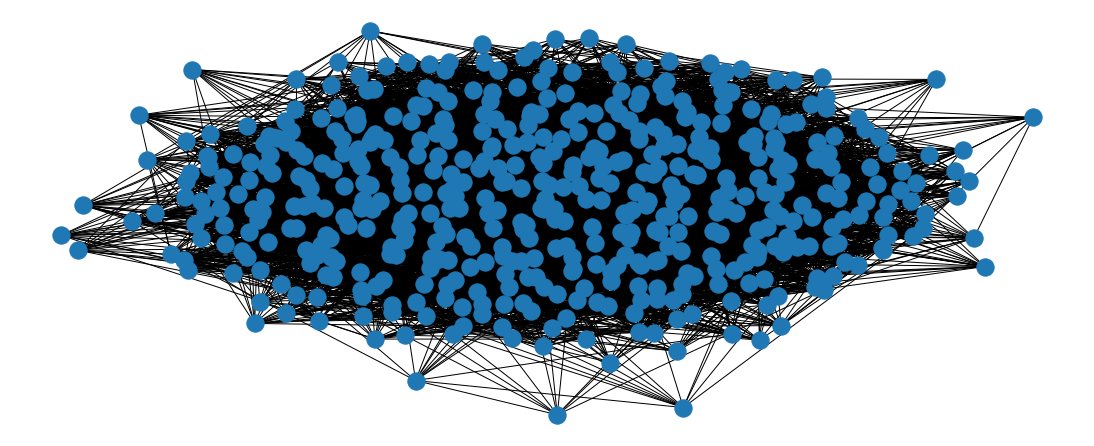

In [47]:
plt.figure(figsize=(15,6))
nx.draw(gene_net)
plt.show()

In [48]:
#open csv and skip headers row
with open('data/bio-decagon-ppi.csv', 'rb') as row:
    next(row, '')   # skip a line
    gene_net = nx.read_edgelist(row, delimiter=',')

In [49]:
###REPLACEMENT
ppi=pd.read_csv('data/bio-decagon-ppi.csv')
targets=pd.read_csv('data/bio-decagon-targets.csv')
combo=pd.read_csv('data/bio-decagon-combo.csv')

#sampling
ppi=ppi.sample(frac=0.1, random_state=10)
targets=targets.sample(frac=0.1, random_state=10)
combo=combo.sample(frac=0.1, random_state=10)

gene_net = nx.from_pandas_edgelist(ppi,'Gene 1', 'Gene 2')
gene_adj = nx.adjacency_matrix(gene_net)
gene_degrees = np.array(gene_adj.sum(axis=0)).squeeze()

gene_drug_adj = nx.from_pandas_edgelist(targets,'STITCH', 'Gene')
gene_drug_adj = nx.adjacency_matrix(gene_drug_adj)
drug_gene_adj = gene_drug_adj.transpose(copy=True)

drug_drug_adj_list = []
grouped = combo.groupby('Polypharmacy Side Effect')
for name, group in grouped:
    drug_drug_adj_list.append(nx.adjacency_matrix(nx.from_pandas_edgelist(group,'STITCH 1', 'STITCH 2')))
drug_degrees_list = [np.array(drug_adj.sum(axis=0)).squeeze() for drug_adj in drug_drug_adj_list]

val_test_size = 0.05
n_genes = len(gene_net.nodes)
n_drugs = pd.concat([combo['STITCH 1'],combo['STITCH 2'],targets.STITCH]).nunique()

In [50]:
'''
Train model
Traceback (most recent call last):
  File "decagon-master/main.py", line 308, in <module>
    outs = sess.run([opt.opt_op, opt.cost, opt.batch_edge_type_idx], feed_dict=feed_dict)
  File "decagon-master/venv/lib/python2.7/site-packages/tensorflow/python/client/session.py", line 900, in run
    run_metadata_ptr)
  File "decagon-master/venv/lib/python2.7/site-packages/tensorflow/python/client/session.py", line 1135, in _run
    feed_dict_tensor, options, run_metadata)
  File "decagon-master/venv/lib/python2.7/site-packages/tensorflow/python/client/session.py", line 1316, in _do_run
    run_metadata)
  File "decagon-master/venv/lib/python2.7/site-packages/tensorflow/python/client/session.py", line 1335, in _do_call
    raise type(e)(node_def, op, message)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Cannot multiply A and B because inner dimension does not match: 108 vs. 644.  Did you forget a transpose?  Dimensions of A: [108, 108).  Dimensions of B: [644,64]
	 [[Node: decagonmodel/graphconvolutionsparsemulti_4/SparseTensorDenseMatMul_91/SparseTensorDenseMatMul = SparseTensorDenseMatMul[T=DT_FLOAT, Tindices=DT_INT64, adjoint_a=false, adjoint_b=false, _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_Placeholder_150_0_566, _arg_Placeholder_149_0_554, _arg_Placeholder_148_0_543, decagonmodel/graphconvolutionsparsemulti_4/SparseTensorDenseMatMul_90/SparseTensorDenseMatMul)]]

Caused by op u'decagonmodel/graphconvolutionsparsemulti_4/SparseTensorDenseMatMul_91/SparseTensorDenseMatMul', defined at:
  File "decagon-master/main.py", line 264, in <module>
    decoders=edge_type2decoder,
  File "decagon-master/decagon/deep/model.py", line 62, in __init__
    self.build()
  File "decagon-master/decagon/deep/model.py", line 36, in build
    self._build()
  File "decagon-master/decagon/deep/model.py", line 72, in _build
    logging=self.logging)(self.inputs[j]))
  File "decagon-master/decagon/deep/layers.py", line 66, in __call__
    outputs = self._call(inputs)
  File "decagon-master/decagon/deep/layers.py", line 90, in _call
    x = tf.sparse_tensor_dense_matmul(self.adj_mats[self.edge_type][k], x)
  File "decagon-master/venv/lib/python2.7/site-packages/tensorflow/python/ops/sparse_ops.py", line 1837, in sparse_tensor_dense_matmul
    adjoint_b=adjoint_b)
  File "decagon-master/venv/lib/python2.7/site-packages/tensorflow/python/ops/gen_sparse_ops.py", line 2714, in sparse_tensor_dense_mat_mul
    name=name)
  File "decagon-master/venv/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "decagon-master/venv/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 3392, in create_op
    op_def=op_def)
  File "decagon-master/venv/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Cannot multiply A and B because inner dimension does not match: 108 vs. 644.  Did you forget a transpose?  Dimensions of A: [108, 108).  Dimensions of B: [644,64]
	 [[Node: decagonmodel/graphconvolutionsparsemulti_4/SparseTensorDenseMatMul_91/SparseTensorDenseMatMul = SparseTensorDenseMatMul[T=DT_FLOAT, Tindices=DT_INT64, adjoint_a=false, adjoint_b=false, _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_Placeholder_150_0_566, _arg_Placeholder_149_0_554, _arg_Placeholder_148_0_543, decagonmodel/graphconvolutionsparsemulti_4/SparseTensorDenseMatMul_90/SparseTensorDenseMatMul)]]
'''


'\nTrain model\nTraceback (most recent call last):\n  File "decagon-master/main.py", line 308, in <module>\n    outs = sess.run([opt.opt_op, opt.cost, opt.batch_edge_type_idx], feed_dict=feed_dict)\n  File "decagon-master/venv/lib/python2.7/site-packages/tensorflow/python/client/session.py", line 900, in run\n    run_metadata_ptr)\n  File "decagon-master/venv/lib/python2.7/site-packages/tensorflow/python/client/session.py", line 1135, in _run\n    feed_dict_tensor, options, run_metadata)\n  File "decagon-master/venv/lib/python2.7/site-packages/tensorflow/python/client/session.py", line 1316, in _do_run\n    run_metadata)\n  File "decagon-master/venv/lib/python2.7/site-packages/tensorflow/python/client/session.py", line 1335, in _do_call\n    raise type(e)(node_def, op, message)\ntensorflow.python.framework.errors_impl.InvalidArgumentError: Cannot multiply A and B because inner dimension does not match: 108 vs. 644.  Did you forget a transpose?  Dimensions of A: [108, 108).  Dimensions 

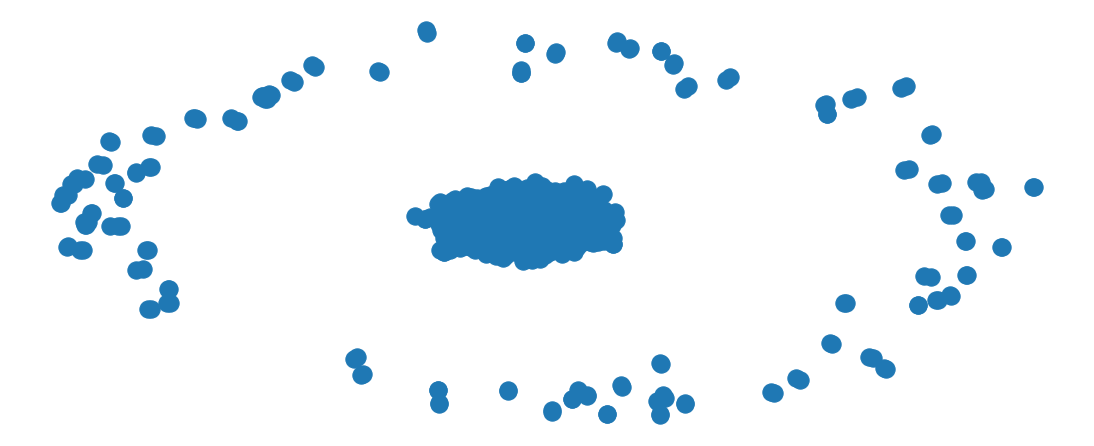

In [51]:
plt.figure(figsize=(15,6))
nx.draw(gene_net)
plt.show()